In [1]:
!pip install ipynb

In [2]:
import numpy as np
import pandas as pd
from ipynb.fs.full.nlp import nlp
from ipynb.fs.full.visualization import visualization
from ipynb.fs.full.generates_input import generates_input
from ipynb.fs.full.random_forest import random_forest
from ipynb.fs.full.lightGBM import lightGBM
from ipynb.fs.full.xgboost import xgboost
from ipynb.fs.full.svm import support_vector_machine
from ipynb.fs.full.neural_network import neural_net
from ipynb.fs.full.adaboost import adaboost
from ipynb.fs.full.tsne import tsne

Using TensorFlow backend.


In [3]:
# Change the path to the data sets 
df_train = pd.read_csv("../../input/10k_diabetes/diab_train.csv")
df_test = pd.read_csv("../../input/10k_diabetes/diab_test.csv")

# 1. Preprocessing

## 1.a Preprocessing of textual data (NLP)

The output of each NLP is saved in memory. It will be later combined with outputs of 1.b

### Simple Bag of Words and simple vocabulary

In [4]:
is_all_text_diagnostic_combined = True
is_complex_bag_of_words = False
is_complex_vocabulary = False 

nlp(df_train, df_test, 0.01,1, "simple_nlp_train.csv", "simple_nlp_test.csv", "simple_vocabulary.csv", 
    is_all_text_diagnostic_combined, is_complex_vocabulary, is_complex_bag_of_words, 2, 15, 0.3, 0.7)

Shape of the train and test datasets
(6000, 433)
(2000, 433)


### Complex Bag of Words (tfidf scores with ngrams) and complex vocabulary

In [4]:
is_all_text_diagnostic_combined = True
is_complex_bag_of_words = True
is_complex_vocabulary = True 

nlp(df_train, df_test, 0,1, "complex_nlp_train.csv", "complex_nlp_test.csv", "complex_vocabulary.csv", 
    is_all_text_diagnostic_combined, is_complex_vocabulary, is_complex_bag_of_words, 1, 15, 0.3, 0.7)

Shape of the train and test datasets
(6000, 394)
(2000, 394)


## 1.b Combining (1.a) with preprocessing of non-textual data

In [5]:
# Prepocessing and combining with simple Bag of Words and simple vocabulary of (1.a)
generates_input("simple_nlp_train.csv" , "simple_nlp_test.csv" , "simple_x_train.csv", "simple_y_train.csv", 
                "simple_x_test.csv", "simple_y_test.csv")

In [6]:
# Prepocessing and combining with complex Bag of Words and complex vocabulary of (1.a)
generates_input("complex_nlp_train.csv" , "complex_nlp_test.csv" , "complex_x_train.csv", "complex_y_train.csv", 
                "complex_x_test.csv", "complex_y_test.csv")

# 2. Models

SVM

In [8]:
# With simple Bag of Words and simple vocabulary
support_vector_machine("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv")

# May take time to run, on the cluster we get:

# F1 score: 0.591455
# ROC: 0.568145
# Confusion matrix
# [[854 353]
#  [453 340]]


In [ ]:
# With complex Bag of Words and complex vocabulary
support_vector_machine("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv")
    
# May take time to run, on the cluster we get:

# F1 score: 0.601162
# ROC: 0.596260
# Confusion matrix:
# [[724 483]
#  [323 470]]


Neural Network

In [11]:
# With simple Bag of Words and simple vocabulary
neural_net("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 481)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                24100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 24,151
Trainable params: 24,151
Non-trainable params: 0
_________________________________________________________________
Train on 5400 samples, validate on 600 samples
Epoch 1/1000
 - 1s - loss: 2.7972 - acc: 0.5380 - val_loss: 0.7310 - val_acc: 0.5933

Epoch 00001: val_acc improved from -inf to 0.59333, saving model to neural_net.h5
Epoch 2/1000
 - 0s - loss: 1.5690 - acc: 0.5556 - val_loss: 0.9999 - val_acc: 0.6067

Epoch 00002: val_acc improved from 0.59333 to 0.60667, saving model to neural_net.h5

In [12]:
# With complex Bag of Words and complex vocabulary
neural_net("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv")

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 442)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 22,201
Trainable params: 22,201
Non-trainable params: 0
_________________________________________________________________
Train on 5400 samples, validate on 600 samples
Epoch 1/1000
 - 0s - loss: 3.4086 - acc: 0.5319 - val_loss: 1.4567 - val_acc: 0.5983

Epoch 00001: val_acc improved from -inf to 0.59833, saving model to neural_net.h5
Epoch 2/1000
 - 0s - loss: 1.3754 - acc: 0.5511 - val_loss: 0.6968 - val_acc: 0.6167

Epoch 00002: val_acc improved from 0.59833 to 0.61667, saving model to neural_net.h5

Adaboost

In [13]:
# With simple Bag of Words and simple vocabulary
adaboost("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv")

/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test f1 score : 0.4389465283320032 
Test roc score : 0.5967558932707587 


In [14]:
# With complex Bag of Words and complex vocabulary
adaboost("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv")


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test f1 score : 0.4492063492063493 
Test roc score : 0.602214279669561 


Xgboost

In [15]:
# With simple Bag of Words and simple vocabulary
xgboost("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv")

/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score: 0.656169
ROC: 0.630393
[[986 221]
 [441 352]]


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [16]:
# With complex Bag of Words and complex vocabulary
xgboost("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv")

/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score: 0.657308
ROC: 0.631907
[[979 228]
 [434 359]]


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


LightGBM

In [17]:
# With simple Bag of Words and simple vocabulary
lightGBM("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv")

F1 score: 0.630102
ROC: 0.702387
[[1020  187]
 [ 506  287]]


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [18]:
# With complex Bag of Words and complex vocabulary
lightGBM("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv")

F1 score: 0.641680
ROC: 0.700536
[[1020  187]
 [ 488  305]]


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Random Forest

In [19]:
# With simple Bag of Words and simple vocabulary
random_forest("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv")

ipynb.fs.full.random_forest:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


F1 score: 0.632295
ROC: 0.699737
[[1062  145]
 [ 529  264]]


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [20]:
# With complex Bag of Words and complex vocabulary
random_forest("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv")

ipynb.fs.full.random_forest:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


F1 score: 0.640156
ROC: 0.695612
[[1044  163]
 [ 506  287]]


/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


# 3. Visualization

## Visualization used to construct a better vocabulary

Visualization of the simple vocabulary

In [21]:
visualization('simple_vocabulary.csv', 'simple_nlp_train.csv', df_train, 2, 150, 0.002, 0.025, 0.010)

Visualization of the complex vocabulary 

In [20]:
visualization('complex_vocabulary.csv', 'complex_nlp_train.csv', df_train, 2, 150, 0.002, 0.025, 0.010)

## PL visualization

a-Visualization of the data with simple vocabulary 

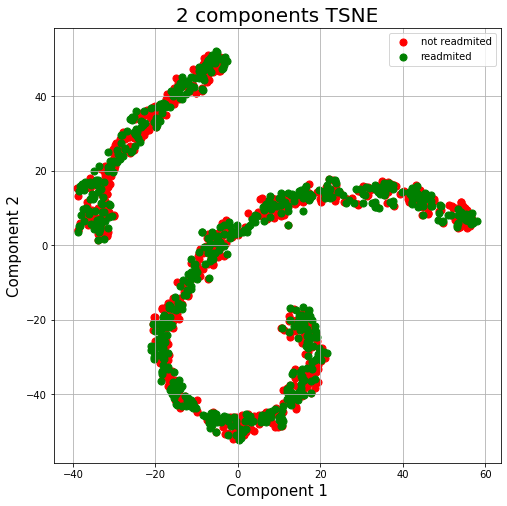

In [22]:
tsne("simple_x_train.csv", "simple_x_test.csv", "simple_y_train.csv", "simple_y_test.csv" , 'plot_tnse_readmited_simple.png')

b-Visualization of the data with complex vocabulary 

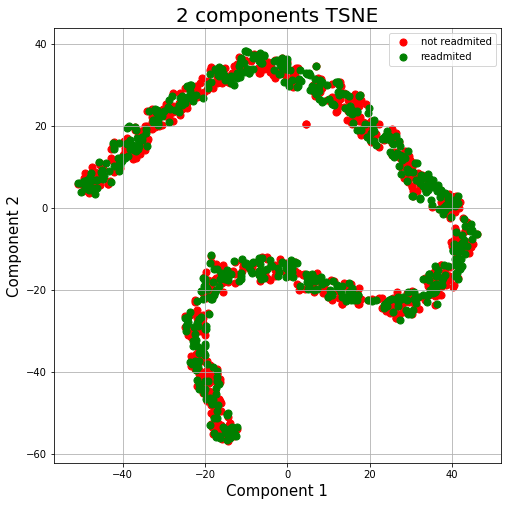

In [22]:
tsne("complex_x_train.csv", "complex_x_test.csv", "complex_y_train.csv", "complex_y_test.csv" , 'plot_tnse_readmited_complex.png')